In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Pipelines de métodos de selección

### Datos generales

from project.feature_selection.feature_selector import FSPipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from project.feature_selection.feature_selector import FSPipelineEvaluator
from sklearn.model_selection import RepeatedStratifiedKFold
from project.feature_selection.feature_selector import FeatureSelection
from sklearn.naive_bayes import GaussianNB

metric = "gmean"
norm = ("minmax", MinMaxScaler())
estimator = ("naiveBayes", GaussianNB())
cv = RepeatedStratifiedKFold(5, n_repeats=30, random_state=None)
max_n_features = 100
corpus_id = "ma"

## Pipelines

# Fisher
fisher_pipeline = FSPipeline([
    norm,
    ("fs", FeatureSelection("fisher", max_n_features)),
    estimator,
])

# ReliefF
reliefF_pipeline = FSPipeline([
    norm,
    ("fs", FeatureSelection("reliefF", max_n_features)),
    estimator,
])

# Chi2
chi2_pipeline = FSPipeline([
    norm,
    ("fs", FeatureSelection("chi_square", max_n_features)),
    estimator,
])

ev_fs = FSPipelineEvaluator([fisher_pipeline,
                             reliefF_pipeline,
                             chi2_pipeline,
                             ],
                            cv,
                            metric,
                            max_n_features)



/home/howl/miniconda3/envs/Tesis/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [3]:
from project.utils import read_datasets

In [4]:
datasets = read_datasets("ma")

In [5]:
%time res = ev_fs._run(corpus_id, datasets, n_jobs=None)

2018-08-30 15:25:22,416 - feature_selection - INFO - Evaluando ma
2018-08-30 15:25:22,709 - feature_selection - INFO -  Evaluación de dataset: dataset_prostate_singh iniciada.
2018-08-30 15:25:22,719 - feature_selection - INFO -  Evaluación de dataset: dataset_leukemia_armstrong iniciada.
2018-08-30 15:25:22,734 - feature_selection - INFO -  Evaluación de dataset: dataset_lymphoma_dave_2 iniciada.
2018-08-30 15:25:22,738 - feature_selection - INFO -  Evaluación de dataset: dataset_srbct_khan iniciada.
2018-08-30 15:25:22,750 - feature_selection - INFO -  Evaluación de dataset: dataset_breast_west iniciada.
2018-08-30 15:25:22,791 - feature_selection - INFO -  Evaluación de dataset: dataset_cns_pomeroy_2 iniciada.
2018-08-30 15:25:22,787 - feature_selection - INFO -  Evaluación de dataset: dataset_bladder_sanchez-carbayo iniciada.
2018-08-30 15:25:22,800 - feature_selection - INFO -  Evaluación de dataset: dataset_breast_veer iniciada.
2018-08-30 15:30:53,937 - feature_selection - INFO 

2018-08-30 16:25:09,282 - feature_selection - INFO -  Evaluación de dataset: dataset_colon_alon terminada.
2018-08-30 16:25:12,934 - feature_selection - INFO -  Evaluación de dataset: dataset_bladder_blaveri iniciada.
2018-08-30 16:25:47,828 - feature_selection - INFO -  Evaluación de dataset: dataset_prostate_tomlins terminada.
2018-08-30 16:25:50,947 - feature_selection - INFO -  Evaluación de dataset: dataset_breast_minn iniciada.
2018-08-30 16:26:38,915 - feature_selection - INFO -  Evaluación de dataset: dataset_leukemia_bullinger terminada.
2018-08-30 16:26:38,926 - feature_selection - INFO -  Evaluación de dataset: dataset_leukemia_yagi iniciada.
2018-08-30 16:27:28,228 - feature_selection - INFO -  Evaluación de dataset: dataset_ovarian_li_and_campbell terminada.
2018-08-30 16:27:28,251 - feature_selection - INFO -  Evaluación de dataset: dataset_lymphoma_rosenwald iniciada.
2018-08-30 16:27:50,577 - feature_selection - INFO -  Evaluación de dataset: dataset_glioma_freije termi

CPU times: user 18.4 s, sys: 2.34 s, total: 20.8 s
Wall time: 1h 32min 7s


In [12]:
res.ranking().to_csv("ranking_fs.csv")

/home/howl/miniconda3/envs/Tesis/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/howl/miniconda3/envs/Tesis/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


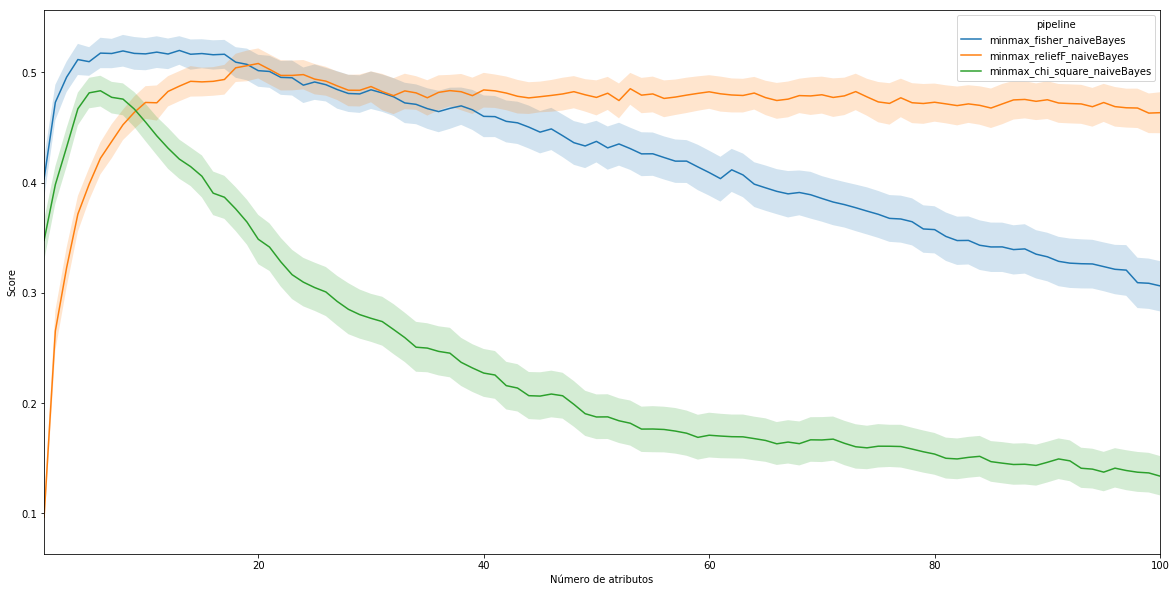

In [10]:
res.results[3].plot()